# LSTM과 GRU 셀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/9-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 9ms/step - loss: 0.6923 - accuracy: 0.5354 - val_loss: 0.6917 - val_accuracy: 0.5468
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6893 - accuracy: 0.6054 - val_loss: 0.6874 - val_accuracy: 0.6250
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6806 - accuracy: 0.6608 - val_loss: 0.6725 - val_accuracy: 0.6814
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6354 - accuracy: 0.7053 - val_loss: 0.5830 - val_accuracy: 0.7200
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5546 - accuracy: 0.7398 - val_loss: 0.5398 - val_accuracy: 0.7456
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5201 - accuracy: 0.7614 - val_loss: 0.5112 - val_accuracy: 0.7666
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4943 - accuracy: 0.7747 - val_loss: 0.4908 - val_accuracy: 0.774

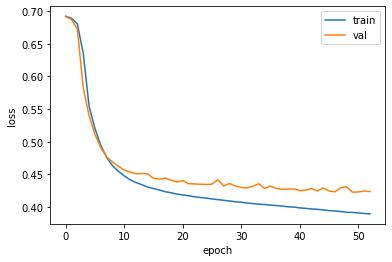

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환 층에 드롭아웃 적용하기

In [6]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 9ms/step - loss: 0.6923 - accuracy: 0.5348 - val_loss: 0.6911 - val_accuracy: 0.5792
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6897 - accuracy: 0.5994 - val_loss: 0.6872 - val_accuracy: 0.6398
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6813 - accuracy: 0.6522 - val_loss: 0.6703 - val_accuracy: 0.6906
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6297 - accuracy: 0.6992 - val_loss: 0.5941 - val_accuracy: 0.7140
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5815 - accuracy: 0.7207 - val_loss: 0.5675 - val_accuracy: 0.7374
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5612 - accuracy: 0.7374 - val_loss: 0.5486 - val_accuracy: 0.7550
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5452 - accuracy: 0.7498 - val_loss: 0.5345 - val_accuracy: 0.7590

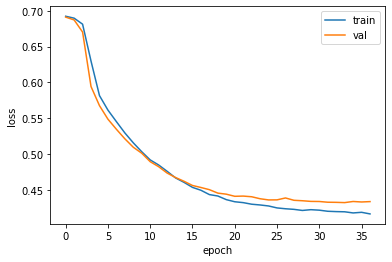

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

In [9]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 14ms/step - loss: 0.6918 - accuracy: 0.5480 - val_loss: 0.6904 - val_accuracy: 0.5902
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6833 - accuracy: 0.6177 - val_loss: 0.6735 - val_accuracy: 0.5924
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6318 - accuracy: 0.6682 - val_loss: 0.5963 - val_accuracy: 0.7110
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5710 - accuracy: 0.7281 - val_loss: 0.5554 - val_accuracy: 0.7390
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5418 - accuracy: 0.7456 - val_loss: 0.5355 - val_accuracy: 0.7420
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5222 - accuracy: 0.7577 - val_loss: 0.5129 - val_accuracy: 0.7610
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5055 - accuracy: 0.7648 - val_loss: 0.4997 - val_accuracy:

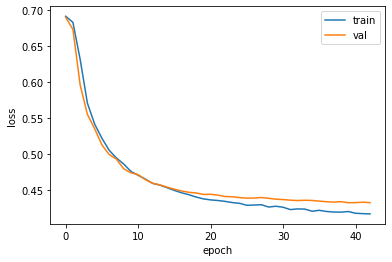

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 신경망 훈련하기

In [12]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 9ms/step - loss: 0.6922 - accuracy: 0.5236 - val_loss: 0.6912 - val_accuracy: 0.5532
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6902 - accuracy: 0.5547 - val_loss: 0.6891 - val_accuracy: 0.5754
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6871 - accuracy: 0.5788 - val_loss: 0.6855 - val_accuracy: 0.5992
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6820 - accuracy: 0.6043 - val_loss: 0.6796 - val_accuracy: 0.6104
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6740 - accuracy: 0.6217 - val_loss: 0.6708 - val_accuracy: 0.6196
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6617 - accuracy: 0.6380 - val_loss: 0.6570 - val_accuracy: 0.6344
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6423 - accuracy: 0.6572 - val_loss: 0.6344 - val_accuracy: 0.6552

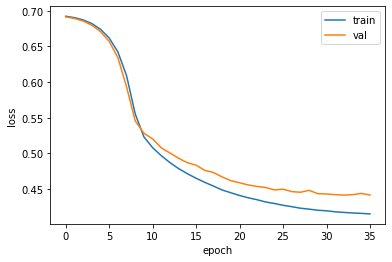

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 마무리

In [15]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 5ms/step - loss: 0.4261 - accuracy: 0.8018


[0.42607444524765015, 0.801800012588501]